In [162]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [163]:
# df_birth = pd.read_csv('daily-total-female-births-CA.csv')

In [164]:
# df_birth.tail()

# we change the index as date 

In [165]:
#type(df_birth)

In [166]:
df_birth = pd.read_csv('daily-total-female-births-CA.csv',index_col = [0], parse_dates = [0], squeeze = True)
df_birth.head()

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: births, dtype: int64

In [167]:
type(df_birth)

pandas.core.series.Series

In [168]:
df_birth.size

365

In [169]:
df_birth.describe()

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: births, dtype: float64

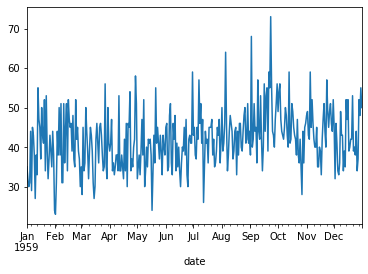

In [170]:
df_birth.plot()

In [171]:
# doing smoothing : taking out some values like we need five valuies moving avg
# rolling help to remove the values and window parameter take 0 to 19 values

df_birth_MA = df_birth.rolling(window = 20).mean()

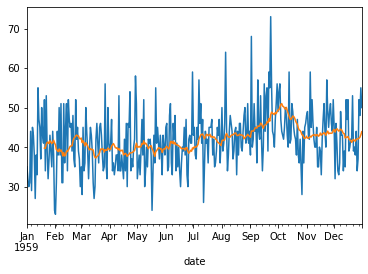

In [172]:
df_birth.plot()
df_birth_MA.plot()

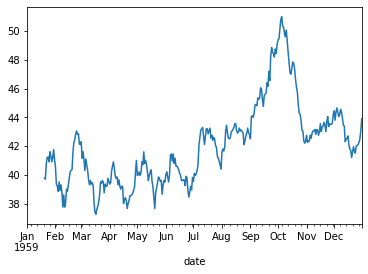

In [173]:
df_birth_MA.plot()

In [174]:


df_baseline_model = pd.concat([df_birth,df_birth.shift(1)], axis = 1)
df_baseline_model.head()

,births,births
date,,
1959-01-01,35,NaN
1959-01-02,32,35.0
1959-01-03,30,32.0
1959-01-04,31,30.0
1959-01-05,44,31.0


In [175]:
type(df_baseline_model)

pandas.core.frame.DataFrame

In [176]:
df_baseline_model.columns

Index(['births', 'births'], dtype='object')

In [177]:
df_baseline_model.columns = ['Original', 'Predicted']

In [178]:
df_baseline_model.head()

,Original,Predicted
date,,
1959-01-01,35,NaN
1959-01-02,32,35.0
1959-01-03,30,32.0
1959-01-04,31,30.0
1959-01-05,44,31.0


In [179]:
df_baseline_model.dropna(inplace = True)


In [187]:
df_baseline_model.head()

,Original,Predicted
date,,
1959-01-02,32,35.0
1959-01-03,30,32.0
1959-01-04,31,30.0
1959-01-05,44,31.0
1959-01-06,29,44.0


In [180]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [185]:
mse_error = mean_squared_error(df_baseline_model.Original, df_baseline_model.Predicted)

In [186]:
np.sqrt(mse_error)

9.177283229394606

In [188]:
# ARIMA - AutoRegressive (p) integrated (d) moving average (q)

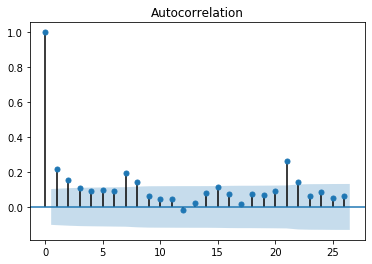

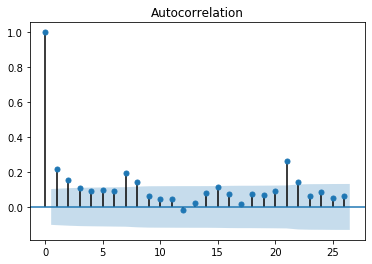

In [189]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# plot_acf is refer to q
# ARIMA (p,d,q)

plot_acf(df_birth)

In [ ]:
# acf = 2 or 3 (q)

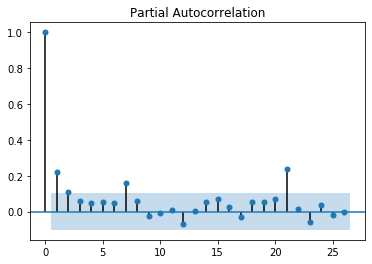

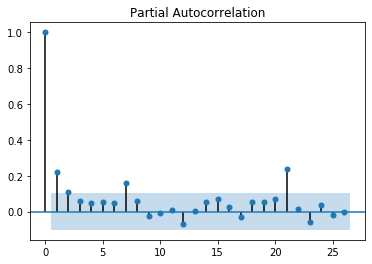

In [190]:
plot_pacf(df_birth)

In [ ]:
# pacf = 1 or 2 (p)

In [191]:
df_birth.size

365

In [192]:
birth_train = df_birth[0:330]
birth_test = df_birth[330:365]

In [252]:
from statsmodels.tsa.arima_model import ARIMA

birth_ARIMA_model = ARIMA(birth_train, order = (3,1,3))

In [253]:
import warnings
warnings.filterwarnings('ignore')

In [254]:
birth_ARIMA_fit = birth_ARIMA_model.fit()

In [255]:
birth_forecast = birth_ARIMA_fit.forecast(steps = 35)[0]
birth_forecast

array([44.59900773, 44.34190316, 44.89769146, 45.60880938, 45.93466286,
       45.64507361, 44.97705739, 44.45193864, 44.47994425, 45.05118441,
       45.7457157 , 46.05311216, 45.75837061, 45.10240093, 44.5973328 ,
       44.63820686, 45.20546269, 45.88226902, 46.1716663 , 45.87224151,
       45.22835783, 44.74291695, 44.7960953 , 45.35908861, 46.01838602,
       46.29032821, 45.98667955, 45.35491024, 44.88867521, 44.95360761,
       45.51207553, 46.15408517, 46.40910752, 46.1016783 , 45.48204061])

In [256]:
birth_test.head()

date
1959-11-27    51
1959-11-28    46
1959-11-29    44
1959-11-30    52
1959-12-01    45
Name: births, dtype: int64

In [257]:
np.sqrt(mean_squared_error(birth_test,birth_forecast))

6.7226659159715325